In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import rqa_functions as rqa
from misc_utils import transform_tuples_to_symbols

In [2]:
def load_pickle_file(filename):
    """
    Load a pickle file.

    Parameters:
    - filename (str): The path to the pickle file to be loaded.

    Returns:
    - The Python object loaded from the pickle file.
    """
    try:
        with open(filename, 'rb') as file:
            data = pickle.load(file)
            return data
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
    except EOFError:
        print(f"Error: The file '{filename}' may be corrupted or empty.")
    except pickle.UnpicklingError:
        print(f"Error: The file '{filename}' could not be unpickled. It may not be a valid pickle file or may be corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        
session_clusterings = load_pickle_file('./clustering_data.pkl')

In [3]:
session_data = list(session_clusterings.keys())

In [4]:
session_clusterings.keys()

dict_keys(['20220721', '20220713', '20220816', '20220810', '20220804', '20221005', '2022100401', '20220815', '20221003', '2022100402', '20220808', '20220811'])

In [5]:
np.shape(session_clusterings['20220721'])

(2, 1985)

In [18]:
custering20220721=np.array(session_clusterings['20220721'])
print(custering20220721)

[[6 2 2 ... 5 5 5]
 [0 0 0 ... 0 5 3]]


In [6]:
sessions = ['20220713','20220721',
           '20220804','20220808',
           '20220810','20220811',
           '20220815','20220816',
           '20221003','2022100401',
           '2022100402','20221005']

In [5]:
from hdf5storage import loadmat, savemat 

In [8]:
outdict=dict()
for ses in range(12):
    outdict[str('ses')+sessions[ses]]=np.array(session_clusterings[sessions[ses]])


In [9]:
savemat('session_clusterings_cells.mat', {'cell_data': outdict}, format='7.3')

In [10]:
outdict.keys()

dict_keys(['ses20220713', 'ses20220721', 'ses20220804', 'ses20220808', 'ses20220810', 'ses20220811', 'ses20220815', 'ses20220816', 'ses20221003', 'ses2022100401', 'ses2022100402', 'ses20221005'])

In [ ]:
savemat('session_clusterings.mat', outdict)

In [6]:

outdict=loadmat('errors.mat')
error_12str=outdict['20220721']

In [7]:
num_taps_12str=0
for key,value in error_12str.items():
    print(f"Key: {key}, Value: {value}")
    num_taps_12str=num_taps_12str+len(value)
print(num_taps_12str) #1985 taps

Key: tr1, Value: [523. 555. 278. 545. 719. 442. 383. 550. 375. 632. 157. 551. 414. 592.
 512. 405. 228. 246. 463. 436. 542. 456. 494. 591. 400. 495. 488. 171.
 125. 467. 587. 431.  93. 510. 326.  29. 592. 571. 518. 365. 434. 592.
 500. 522. 304. 555. 554. 425. 182. 615. 500. 503. 329. 177. 519. 618.
 542. 491. 483. 509. 407. 256. 310. 472. 359. 527. 549. 387. 349. 470.
 600. 501. 554. 423. 232. 298. 490. 630. 554. 512.  44. 581. 303. 461.
 506. 407. 226. 290. 610. 466. 225. 500. 658. 528. 549.  41. 616. 334.
  61. 500. 655. 679. 506. 328.  69. 545. 489. 329. 419. 636. 535. 408.
 286. 637. 525. 592. 553. 540. 194. 599. 436. 400. 556. 559. 537. 492.
 535. 330.  73.  70. 158. 328. 458. 499. 521. 331.  77. 453. 433. 536.
 625. 655. 620. 621. 490. 609. 730. 643. 657. 633. 615. 584. 497. 542.
 468. 276.  84. 173. 520. 521. 572. 750.]
Key: tr10, Value: [592. 543. 464. 459. 517. 483. 510. 535. 397. 560. 439. 368. 353. 425.
 470. 568. 637. 563. 699. 479. 505. 634. 471. 529. 603. 332. 337. 542.


In [10]:
sub1_seq,sub2_seq = session_clusterings['20220721']

In [11]:
joint_seq = list(zip(sub1_seq,sub2_seq))

In [12]:
joint_seq = transform_tuples_to_symbols(joint_seq)

In [13]:
recurrence_matrix = rqa.build_rp(joint_seq)

In [14]:
recurrence_plots = {}
recurrence_plots['20220721'] = {'rp': recurrence_matrix,'symbol_sequence': joint_seq}

In [8]:
import pickle
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
import rqa_functions as rqa
from sklearn.manifold import MDS
from collections import defaultdict
from sklearn.mixture import GaussianMixture
import itertools
from misc_utils import save_to_pickle

/home/zhibinz2/anaconda3/envs/eeg/lib/python3.9/site-packages/sklearn/utils/multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/home/zhibinz2/anaconda3/envs/eeg/lib/python3.9/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/zhibinz2/anaconda3/envs/eeg/lib/python3.9/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, 

In [9]:
def find_indices_to_eliminate(subj1, subj2):
    """
    Calculate the indices to be eliminated based on the differences in trial data points
    for two subjects, ensuring that only the necessary data points are removed to align their sizes.

    Parameters:
    - list_indices_subj1: Numpy array of trial sizes for subject 1
    - list_indices_subj2: Numpy array of trial sizes for subject 2

    Returns:
    - index_to_eliminate_subj1: Indices to eliminate from subject 1 to align with subject 2
    - index_to_eliminate_subj2: Indices to eliminate from subject 2 to align with subject 1
    """

    list_indices_subj1 = np.array([i[1] for i in subj1])
    list_indices_subj2 = np.array([i[1] for i in subj2])

    cumsum_subj1 = [sum([x[1] for x in subj1[:i+1]]) for i in range(len(subj1))]
    cumsum_subj2 = [sum([x[1] for x in subj2[:i+1]]) for i in range(len(subj2))]

    index_differences_sub1 = list_indices_subj1 - list_indices_subj2
    index_differences_sub2 = list_indices_subj2 - list_indices_subj1

    index_to_eliminate_subj1 = []
    for i,n_points in enumerate(index_differences_sub1):
        if n_points>0:
            indexes = [j for j in range(cumsum_subj1[i]-index_differences_sub1[i],cumsum_subj1[i])]
            index_to_eliminate_subj1.extend(indexes)

    index_to_eliminate_subj2 = []
    for i,n_points in enumerate(index_differences_sub2):
        if n_points>0:
            indexes = [j for j in range(cumsum_subj2[i]-index_differences_sub2[i],cumsum_subj2[i])]
            index_to_eliminate_subj2.extend(indexes)

    return index_to_eliminate_subj1[::-1], index_to_eliminate_subj2[::-1]


def session_data_loading(file_path):
    session = (file_path.split('/')[-1]).split('_')[1]
    with open(file_path, 'rb') as file:
        # Load the object from the pickle file
        data = pickle.load(file)

    subj1 = data['subj1']['sizes']
    subj2 = data['subj2']['sizes']

    index_to_eliminate_subj1, index_to_eliminate_subj2 = find_indices_to_eliminate(subj1, subj2)

    file_order_size = []
    for i in range(len(subj1)):
        file_sub1,len_1 = subj1[i]
        file_sub2,len_2 = subj2[i]
        if len_1 < len_2:
            file_order_size.append((file_sub1,file_sub2,len_1))
        else:
            file_order_size.append((file_sub1,file_sub2,len_2))

    mat1 = data['subj1']['distances']
    for index in index_to_eliminate_subj1:
        mat1 = np.delete(np.delete(mat1, index, axis=0), index, axis=1)

    mat2 = data['subj2']['distances']
    for index in index_to_eliminate_subj2:
        mat2 = np.delete(np.delete(mat2, index, axis=0), index, axis=1)

    trial_len = [i[2] for i in file_order_size]
    start_points = list(np.cumsum(trial_len))
    end_points = [i-1 for i in start_points]
    start_points.insert(0,0)
    start_points.pop(-1)
    #print(start_points)
    #print(end_points)
    start_stop = list(zip(start_points,end_points))
    #print(start_stop)

    condition_dictionary = {1: 'Uncoupled', 2: '1_lead', 3: '2_lead', 4: 'Mutual'}
    type_dictionary = {1: 'Synchronization', 2: 'Syncopation'}

    # Initialize an empty list to store each row's data as a dictionary
    data = []

    for i, entry in enumerate(file_order_size):
        session = entry[0].split('/')[0]
        trial = entry[0].split('_')[2][:-4]
        length = entry[2]
        start, stop = start_stop[i]
        # filename = '/data/Italo/finger_tapping_behavioral_data/clean_' + str(session) + '_bpchan.mat'
        # filename = 'C:/Users\zhouz\GitHub/finger_tapping_behavioral_data/clean_' + str(session) + '_bpchan.mat'
        filename = '/home/zhibinz2/Documents/GitHub/finger_tapping_behavioral_data/clean_' + str(session) + '_bpchan.mat'
        beh_data = loadmat(filename)
        conditions = list(beh_data['conditions'][0])
        condition = condition_dictionary[conditions[int(trial)-1]]
        session_type = type_dictionary[beh_data['session'][0][0]]
        # add samples 
        samples = beh_data['samples'][0]

        # Instead of printing, store the data in a dictionary
        row_data = {
            'session': session,
            'session_type': session_type,
            'condition': condition,
            'trial': trial,
            'start': start,
            'stop': stop,
        }

        # Append the dictionary to the list
        data.append(row_data)

    # Convert the list of dictionaries to a pandas DataFrame
    metadata = pd.DataFrame(data)
    session_data = {'Subject 1': mat1,
                    'Subject 2': mat2,
                    'Metadata': metadata,
                    'Session Type': session_type,
                    'samples': samples}
    return session, session_data

In [15]:
# Specify the directory where the files are located
# directory_path = "/data/Italo/correlation_distances"
# directory_path = "C:/Users\zhouz\GitHub\Italo/correlation_distances"
directory_path = "/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/"

In [16]:
# List all files and directories in the specified path
all_items = os.listdir(directory_path)

# Filter out files that start with "dyad_20"
matching_files = [filename for filename in all_items if filename.startswith("dyad_20")]

# Optionally, get the full paths if needed
full_paths = [os.path.join(directory_path, filename) for filename in matching_files]

# Print the list of matching file paths
for file_path in full_paths:
    print(file_path)

/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20220804_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_2022100402_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20221003_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20221005_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20220713_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_2022100401_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20220815_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20220810_distances.pkl
/ssd/zhibin/1overf/Cleaned_sourcedata/cortic

In [17]:
# Loads the correlation matrices in a single dictionary.
session_data = {}
for file_path in full_paths:
    session,data = session_data_loading(file_path)
    session_data[session] = data

In [42]:
file_path

'/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/taplocked/correlation_distances/dyad_20220811_distances.pkl'

In [48]:
session_data

{'20220721': {'Subject 1': array([[0.        , 2.91296733, 2.05584478, ..., 2.83670328, 2.62966957,
          4.32741709],
         [2.91296733, 0.        , 3.32101174, ..., 2.85004377, 5.15734077,
          3.26071132],
         [2.05584478, 3.32101174, 0.        , ..., 2.29479515, 2.72108927,
          2.25474039],
         ...,
         [2.83670328, 2.85004377, 2.29479515, ..., 0.        , 0.30490099,
          0.34830539],
         [2.62966957, 5.15734077, 2.72108927, ..., 0.30490099, 0.        ,
          0.33472363],
         [4.32741709, 3.26071132, 2.25474039, ..., 0.34830539, 0.33472363,
          0.        ]]),
  'Subject 2': array([[0.        , 1.29996093, 3.16577652, ..., 2.0410721 , 2.28628479,
          2.05081462],
         [1.29996093, 0.        , 1.4443945 , ..., 1.65816454, 1.49504898,
          2.17840215],
         [3.16577652, 1.4443945 , 0.        , ..., 1.72054757, 2.63865314,
          6.48441223],
         ...,
         [2.0410721 , 1.65816454, 1.72054757, ...,

In [49]:
metadata=session_data['20220721']['Metadata']

In [43]:
session_code

'20220811'

In [36]:
sub1_seq,sub2_seq = session_clusterings[session_code]

In [38]:
sub1_seq

array([6, 2, 2, ..., 5, 5, 5])

In [39]:
sub2_seq

array([0, 0, 0, ..., 0, 5, 3])

In [40]:
joint_seq = list(zip(sub1_seq,sub2_seq))

In [41]:
joint_seq = transform_tuples_to_symbols(joint_seq)

In [42]:
metadata

session session_type  condition trial  start  stop
0   20220721  Syncopation     1_lead     1      0   161
1   20220721  Syncopation     2_lead     2    162   336
2   20220721  Syncopation     Mutual     3    337   477
3   20220721  Syncopation  Uncoupled     4    478   614
4   20220721  Syncopation     2_lead     5    615   779
5   20220721  Syncopation     1_lead     6    780   956
6   20220721  Syncopation     Mutual     7    957  1088
7   20220721  Syncopation  Uncoupled     8   1089  1273
8   20220721  Syncopation     2_lead     9   1274  1436
9   20220721  Syncopation     Mutual    10   1437  1622
10  20220721  Syncopation     1_lead    11   1623  1804
11  20220721  Syncopation  Uncoupled    12   1805  1984

In [43]:
start_list = list(metadata['start'])
start_list

[0, 162, 337, 478, 615, 780, 957, 1089, 1274, 1437, 1623, 1805]

In [44]:
stop_list = list(metadata['stop'])

In [45]:
start_stop = list(zip(start_list,stop_list))

In [48]:
start_stop

[(0, 161),
 (162, 336),
 (337, 477),
 (478, 614),
 (615, 779),
 (780, 956),
 (957, 1088),
 (1089, 1273),
 (1274, 1436),
 (1437, 1622),
 (1623, 1804),
 (1805, 1984)]

In [46]:
conditions = list(metadata['condition'])

In [47]:
conditions

['1_lead',
 '2_lead',
 'Mutual',
 'Uncoupled',
 '2_lead',
 '1_lead',
 'Mutual',
 'Uncoupled',
 '2_lead',
 'Mutual',
 '1_lead',
 'Uncoupled']

In [49]:
session_type = metadata['session_type'][0]
session_type

'Syncopation'

In [34]:
sub1_seq

array([4, 3, 4, ..., 2, 5, 1])

In [35]:
sub2_seq

array([9, 7, 8, ..., 4, 1, 1])

In [33]:
list(zip(sub1_seq,sub2_seq))

[(4, 9),
 (3, 7),
 (4, 8),
 (5, 7),
 (2, 2),
 (2, 7),
 (5, 2),
 (1, 7),
 (3, 7),
 (3, 2),
 (2, 2),
 (4, 7),
 (4, 8),
 (1, 7),
 (4, 2),
 (3, 2),
 (4, 2),
 (2, 2),
 (1, 7),
 (3, 2),
 (4, 2),
 (5, 7),
 (1, 7),
 (2, 7),
 (4, 7),
 (1, 7),
 (0, 7),
 (3, 2),
 (3, 2),
 (3, 2),
 (4, 8),
 (5, 2),
 (4, 2),
 (3, 2),
 (5, 2),
 (2, 7),
 (5, 2),
 (1, 2),
 (3, 7),
 (2, 7),
 (3, 7),
 (2, 2),
 (2, 2),
 (3, 2),
 (2, 2),
 (2, 2),
 (0, 2),
 (3, 3),
 (4, 7),
 (2, 2),
 (2, 2),
 (2, 7),
 (1, 2),
 (2, 7),
 (1, 7),
 (2, 2),
 (3, 2),
 (2, 2),
 (4, 7),
 (1, 2),
 (1, 2),
 (5, 7),
 (1, 2),
 (2, 7),
 (5, 2),
 (2, 7),
 (1, 7),
 (5, 2),
 (0, 7),
 (3, 7),
 (2, 2),
 (3, 2),
 (4, 2),
 (2, 2),
 (5, 7),
 (3, 2),
 (5, 7),
 (2, 2),
 (5, 7),
 (4, 2),
 (2, 7),
 (4, 7),
 (3, 7),
 (3, 2),
 (4, 2),
 (3, 7),
 (2, 7),
 (2, 2),
 (1, 5),
 (2, 2),
 (1, 2),
 (3, 2),
 (0, 2),
 (1, 7),
 (3, 2),
 (2, 4),
 (3, 7),
 (5, 2),
 (5, 2),
 (1, 2),
 (4, 2),
 (2, 2),
 (3, 7),
 (5, 2),
 (3, 2),
 (1, 7),
 (5, 7),
 (1, 7),
 (5, 7),
 (1, 8),
 (5, 2),
 

In [37]:
transform_tuples_to_symbols(list(zip(sub1_seq,sub2_seq)))

[3,
 4,
 26,
 9,
 12,
 37,
 44,
 58,
 4,
 40,
 12,
 42,
 26,
 58,
 20,
 40,
 20,
 12,
 58,
 40,
 20,
 9,
 58,
 37,
 42,
 58,
 32,
 40,
 40,
 40,
 26,
 44,
 20,
 40,
 44,
 37,
 44,
 34,
 4,
 37,
 4,
 12,
 12,
 40,
 12,
 12,
 10,
 23,
 42,
 12,
 12,
 37,
 34,
 37,
 58,
 12,
 40,
 12,
 42,
 34,
 34,
 9,
 34,
 37,
 44,
 37,
 58,
 44,
 32,
 4,
 12,
 40,
 20,
 12,
 9,
 40,
 9,
 12,
 9,
 20,
 37,
 42,
 4,
 40,
 20,
 4,
 37,
 12,
 38,
 12,
 34,
 40,
 10,
 58,
 40,
 33,
 4,
 44,
 44,
 34,
 20,
 12,
 4,
 44,
 40,
 58,
 9,
 58,
 9,
 39,
 44,
 44,
 10,
 42,
 37,
 34,
 44,
 17,
 20,
 12,
 44,
 34,
 34,
 32,
 37,
 20,
 4,
 10,
 12,
 48,
 3,
 44,
 40,
 32,
 20,
 10,
 44,
 28,
 23,
 2,
 28,
 2,
 51,
 28,
 2,
 2,
 17,
 56,
 23,
 17,
 56,
 28,
 2,
 17,
 23,
 51,
 28,
 12,
 2,
 37,
 56,
 28,
 56,
 56,
 40,
 51,
 23,
 17,
 2,
 23,
 28,
 51,
 20,
 2,
 28,
 10,
 28,
 17,
 10,
 51,
 28,
 23,
 56,
 23,
 23,
 28,
 17,
 17,
 2,
 17,
 17,
 2,
 10,
 17,
 17,
 56,
 17,
 28,
 51,
 2,
 28,
 28,
 28,
 56,
 56,
 56,
 

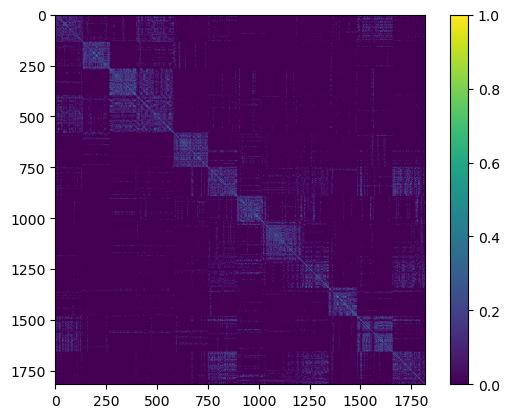

In [40]:
plt.imshow(recurrence_matrix)
plt.colorbar()

In [24]:
data = []
recurrence_plots = {}

for session_code in session_data:
    metadata = session_data[session_code]['Metadata']
    sub1_seq,sub2_seq = session_clusterings[session_code]
    joint_seq = list(zip(sub1_seq,sub2_seq))
    joint_seq = transform_tuples_to_symbols(joint_seq)

    start_list = list(metadata['start'])
    stop_list = list(metadata['stop'])
    start_stop = list(zip(start_list,stop_list))
    conditions = list(metadata['condition'])
    session_type = metadata['session_type'][0]

    recurrence_matrix = rqa.build_rp(joint_seq)
    recurrence_plots[session_code] = {'rp': recurrence_matrix,
                                      'symbol_sequence': joint_seq}
    for j,indices in enumerate(start_stop):
        condition = conditions[j]
        if condition == '1_lead' or condition == '2_lead':
            condition = 'Leader-Follower'
        start, stop = indices
        
        matrix = recurrence_matrix[start:stop,start:stop]

        vlines = rqa.find_lines(matrix, min_len=2, direction='vertical')
        vmean = np.mean(vlines)
        vvar = np.var(vlines)
        dlines = rqa.find_lines(matrix, min_len=2, direction='diagonal')
        dmean = np.mean(dlines)
        dvar = np.var(dlines)

        df_row = {'Session': session_code,
                'Session_Type': session_type,
                'Condition': condition,
                'Average_Dwell_Time': vmean,
                'Average_Motif_Length': dmean}
        data.append(df_row)

data_df = pd.DataFrame(data)
data_df

Session     Session_Type        Condition  Average_Dwell_Time  \
0    20220804  Synchronization  Leader-Follower            2.740045   
1    20220804  Synchronization           Mutual            2.732272   
2    20220804  Synchronization        Uncoupled            2.557029   
3    20220804  Synchronization  Leader-Follower            2.375421   
4    20220804  Synchronization        Uncoupled            2.591512   
..        ...              ...              ...                 ...   
139  20220721      Syncopation        Uncoupled            2.000000   
140  20220721      Syncopation  Leader-Follower            2.000000   
141  20220721      Syncopation           Mutual            2.000000   
142  20220721      Syncopation  Leader-Follower            2.210526   
143  20220721      Syncopation        Uncoupled            2.557420   

     Average_Motif_Length  
0                6.191824  
1                4.479452  
2                7.094262  
3                2.877193  
4                5.992806  
..                    ...  
139              2.105263  
140              2.035714  
141              2.030303  
142              2.033333  
143              2.648590  

[144 rows x 5 columns]

In [25]:
import pandas as pd

def dataframe_to_dict_of_lists(data_df):
    """
    Breaks down a pandas DataFrame into a dictionary of lists.

    Args:
        data_df (pd.DataFrame): The input DataFrame.

    Returns:
        dict: A dictionary where keys are column names and values are lists
              containing the data from the corresponding column.
    """
    dict_of_lists = {}
    for column in data_df.columns:
        dict_of_lists[column] = data_df[column].tolist()
    return dict_of_lists

if __name__ == '__main__':
    dict_result = dataframe_to_dict_of_lists(data_df)
    print(dict_result)

{'Session': ['20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '20220804', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '2022100402', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221003', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20221005', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '20220713', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '2022100401', '20220815', '20220815', '20220815', '20220815', '20220815', '20220815', '20

In [26]:
dict_result.keys()

dict_keys(['Session', 'Session_Type', 'Condition', 'Average_Dwell_Time', 'Average_Motif_Length'])

In [29]:
dict_result['Average_Dwell_Time']

[2.740045078888054,
 2.732272069464544,
 2.557029177718833,
 2.3754208754208754,
 2.5915119363395225,
 2.199052132701422,
 2.4385026737967914,
 2.621084797555386,
 2.3118279569892475,
 2.980327868852459,
 2.8395860284605434,
 2.451781970649895,
 2.426509887760556,
 2.1422594142259412,
 2.1435185185185186,
 2.0,
 2.0,
 2.0,
 2.0436893203883497,
 2.739644970414201,
 2.0,
 2.487758945386064,
 2.4565217391304346,
 2.2993348115299335,
 2.304268846503179,
 2.1148936170212767,
 2.188775510204082,
 2.578125,
 2.3858267716535435,
 2.1724137931034484,
 2.3213811420982737,
 2.0186721991701244,
 2.339622641509434,
 2.4921875,
 2.1880341880341883,
 2.0,
 2.4141630901287554,
 2.0577617328519855,
 2.120567375886525,
 2.27027027027027,
 2.0,
 2.2238805970149254,
 2.084577114427861,
 2.0721868365180467,
 2.181122448979592,
 2.375609756097561,
 2.2232142857142856,
 2.1879432624113475,
 2.0,
 2.0,
 2.295,
 2.0,
 2.0,
 2.1323529411764706,
 2.0,
 2.5526315789473686,
 2.036036036036036,
 2.141304347826087,


In [30]:
from hdf5storage import loadmat, savemat 

In [31]:
savemat('dict_result.mat', {'cell_data': dict_result}, format='7.3')

54


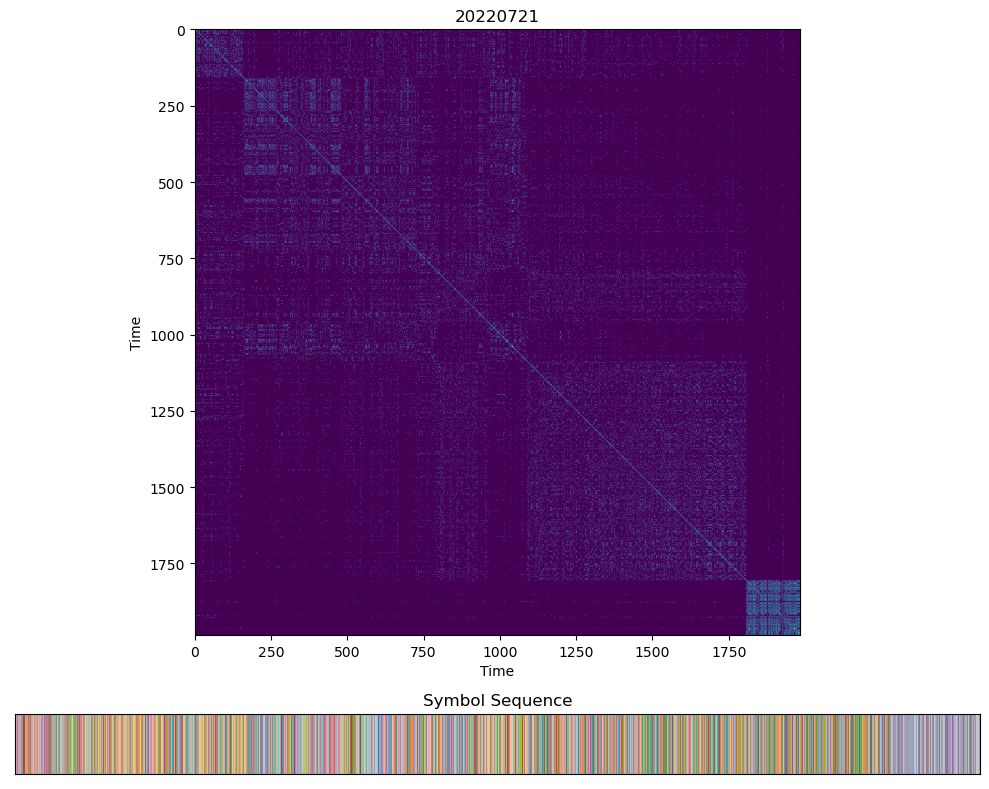

48


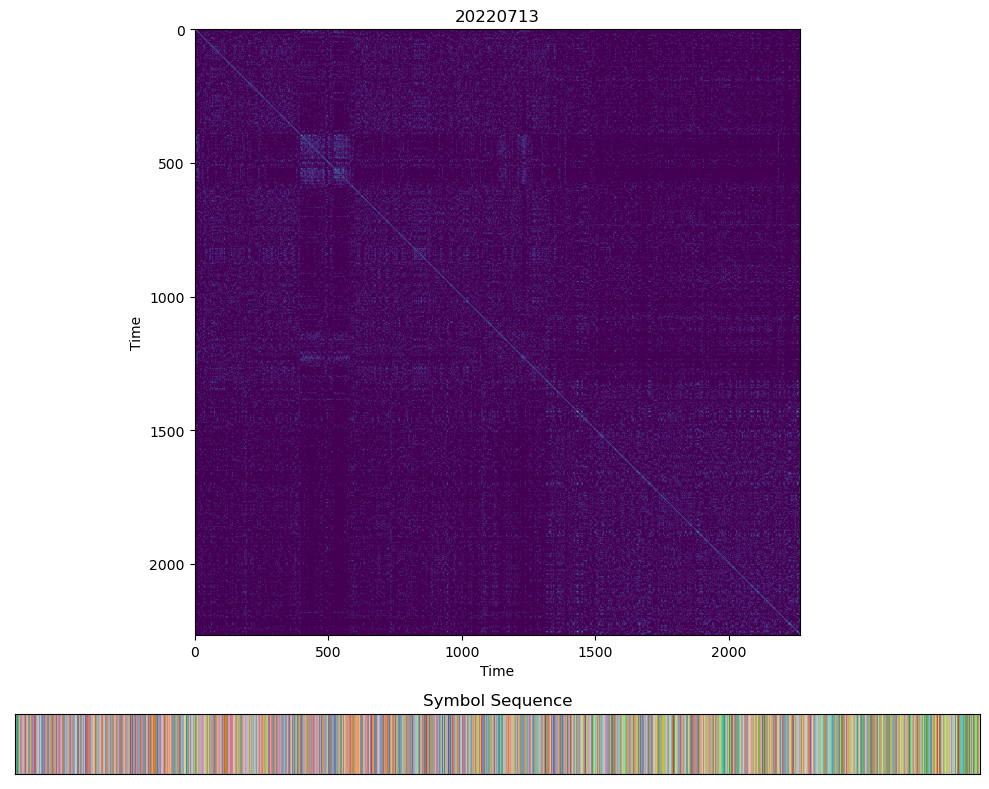

48


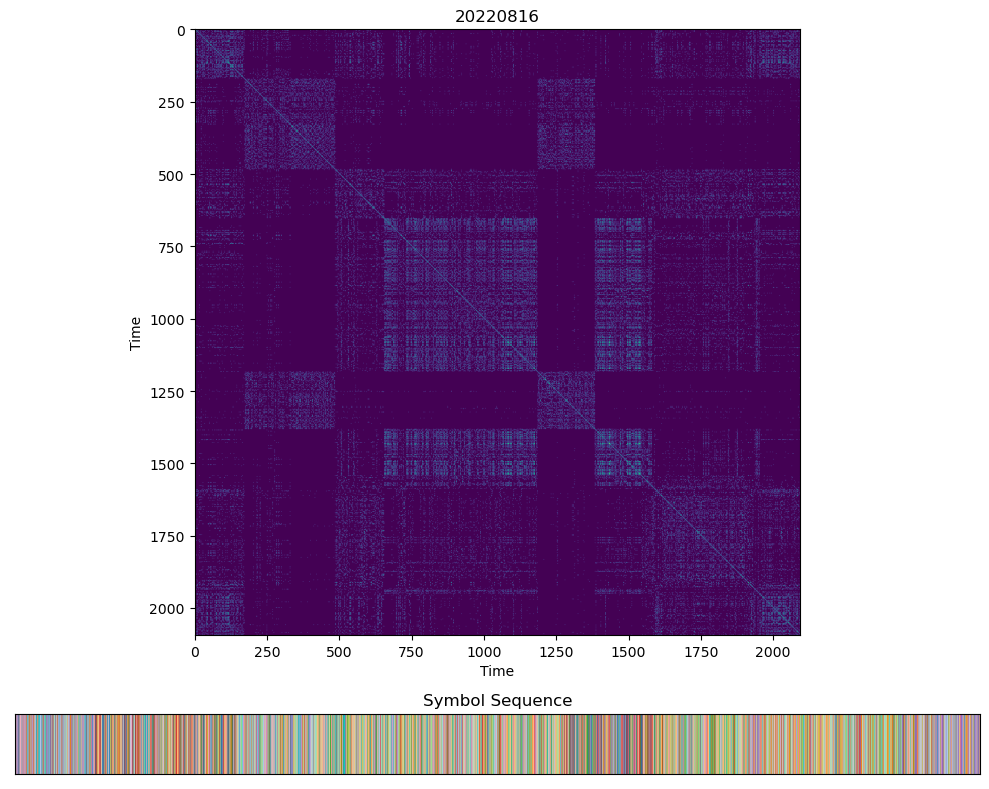

64


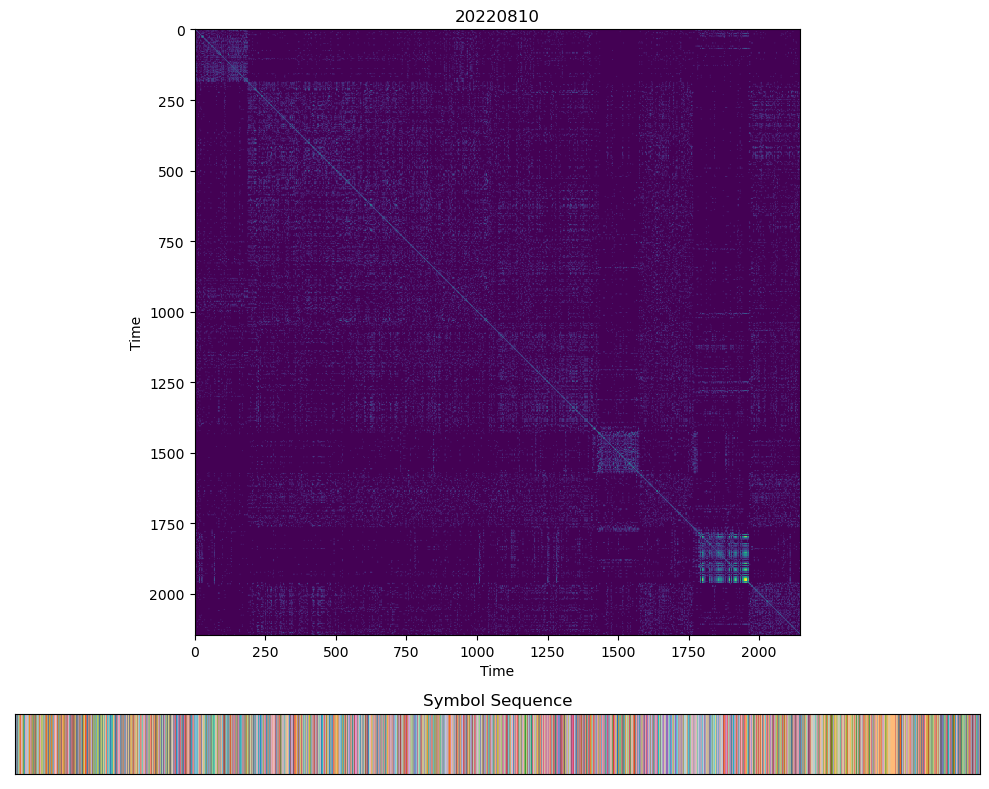

88


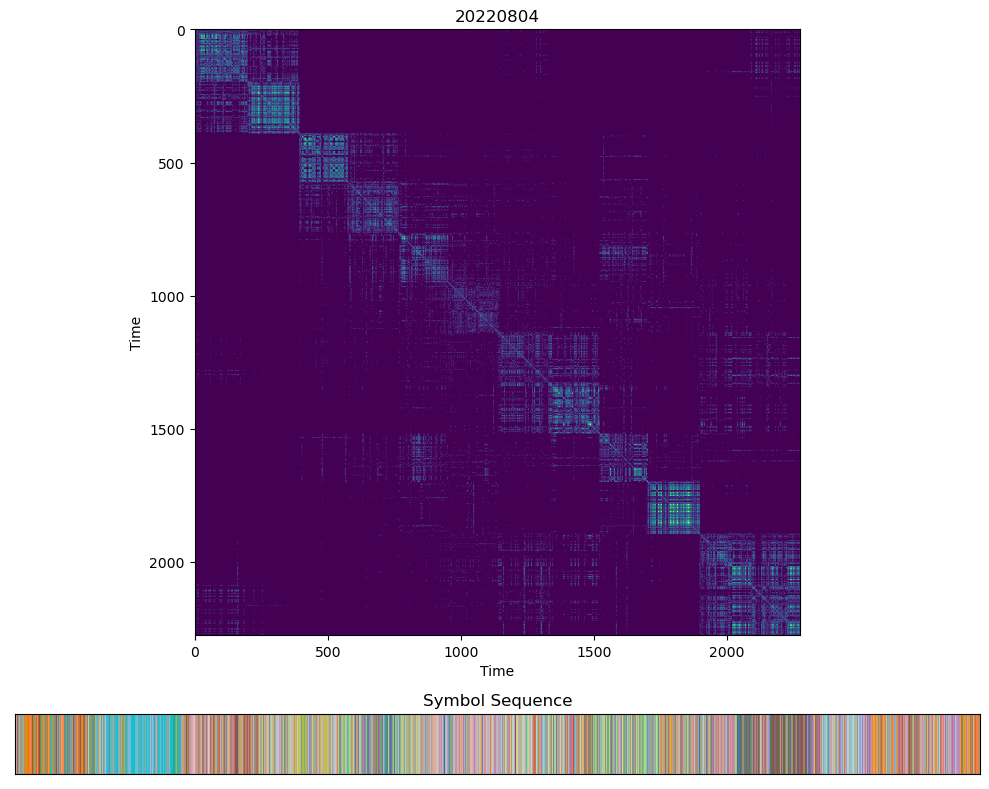

62


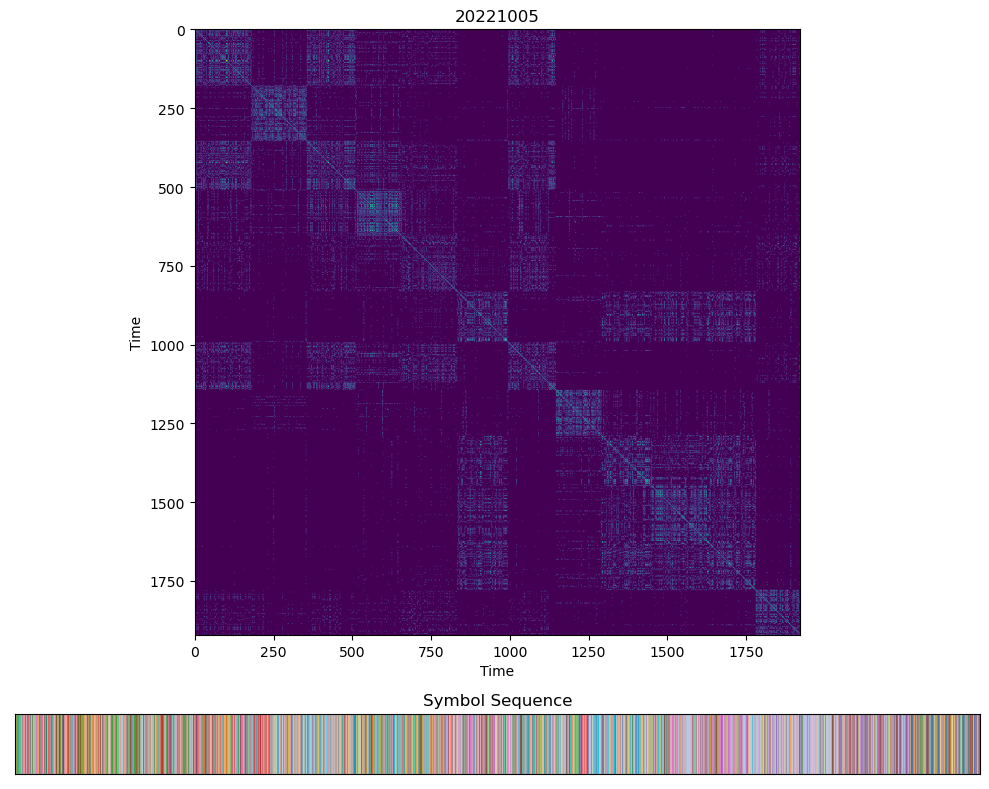

62


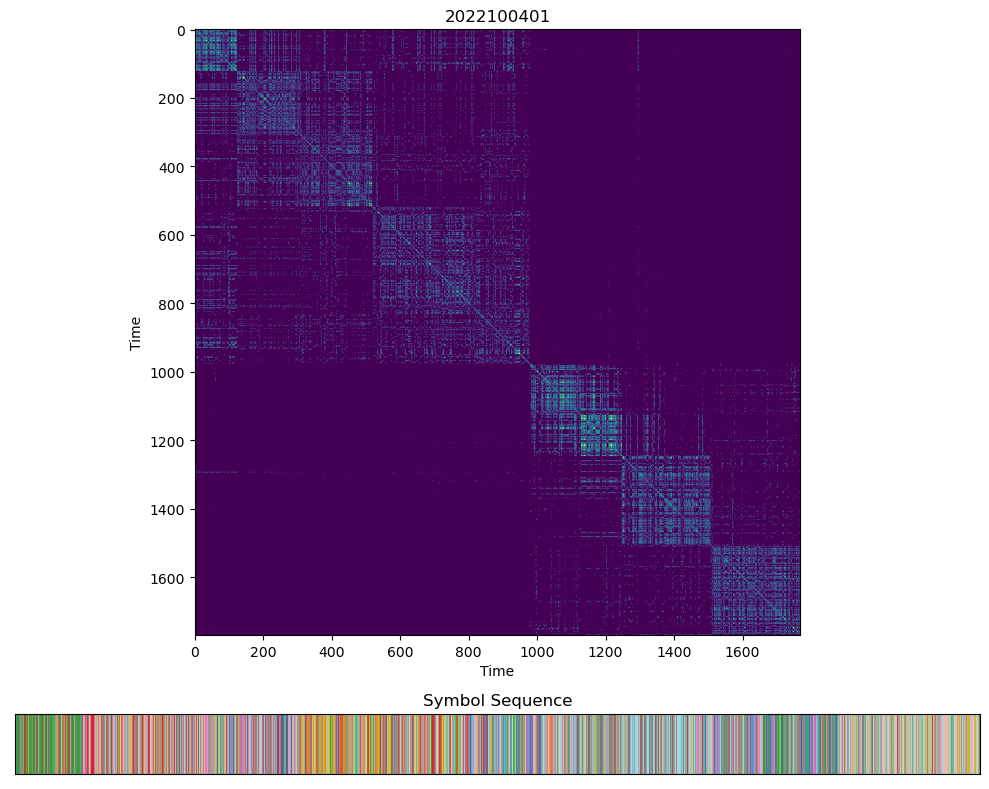

90


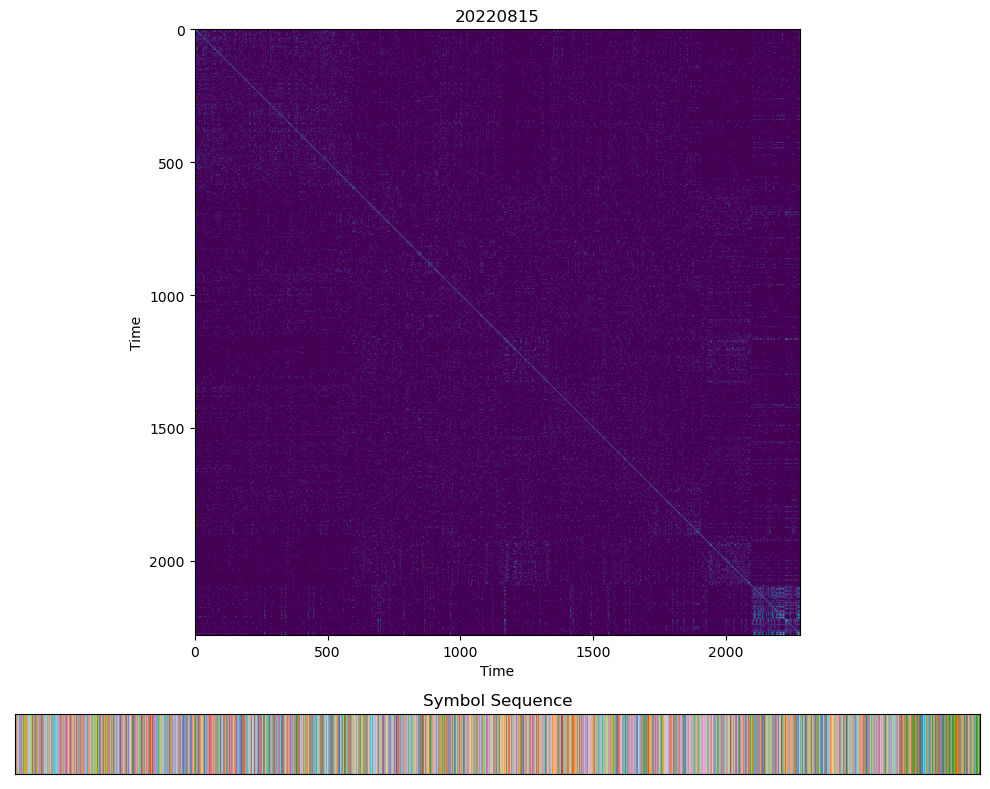

81


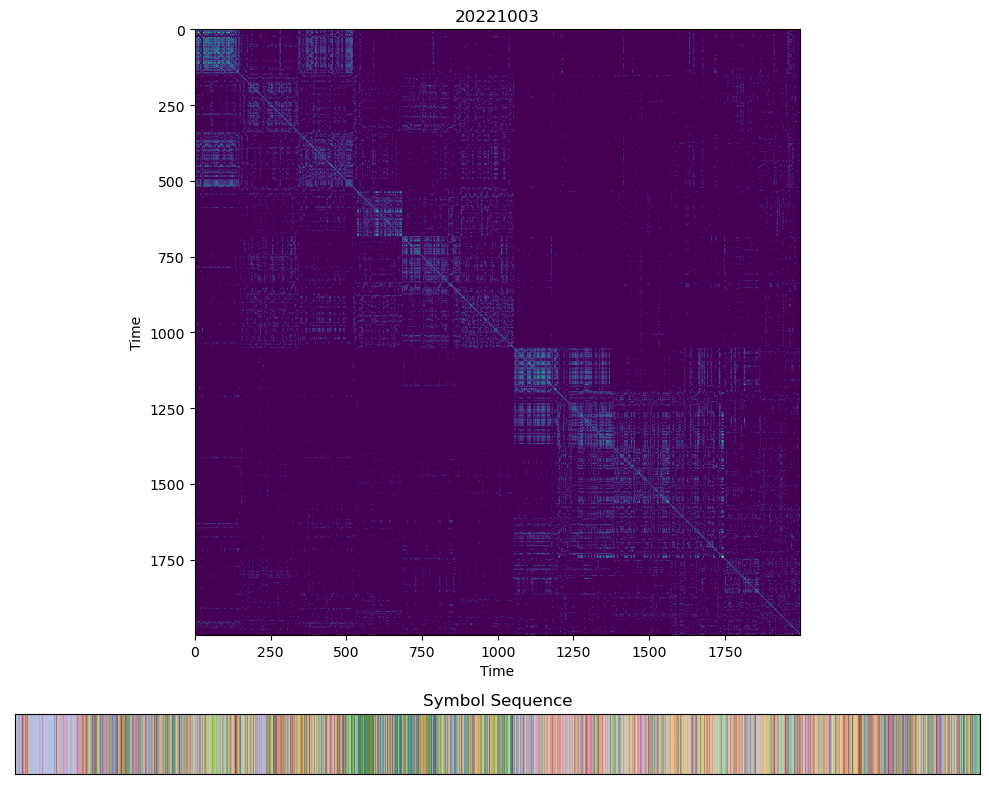

42


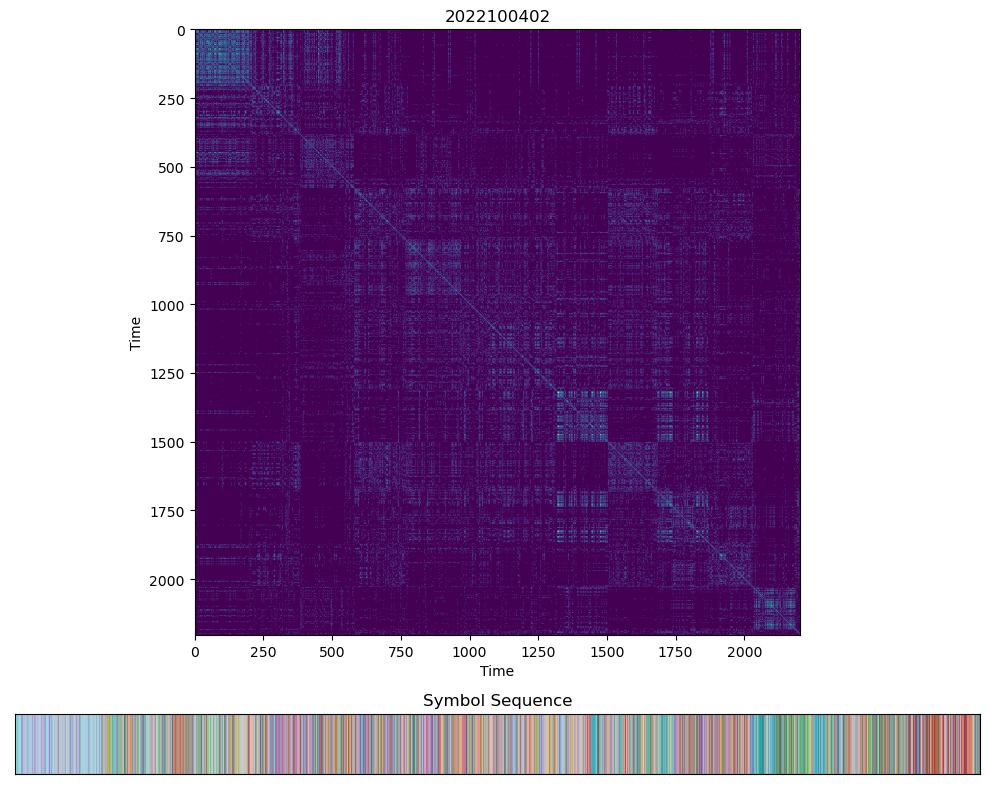

67


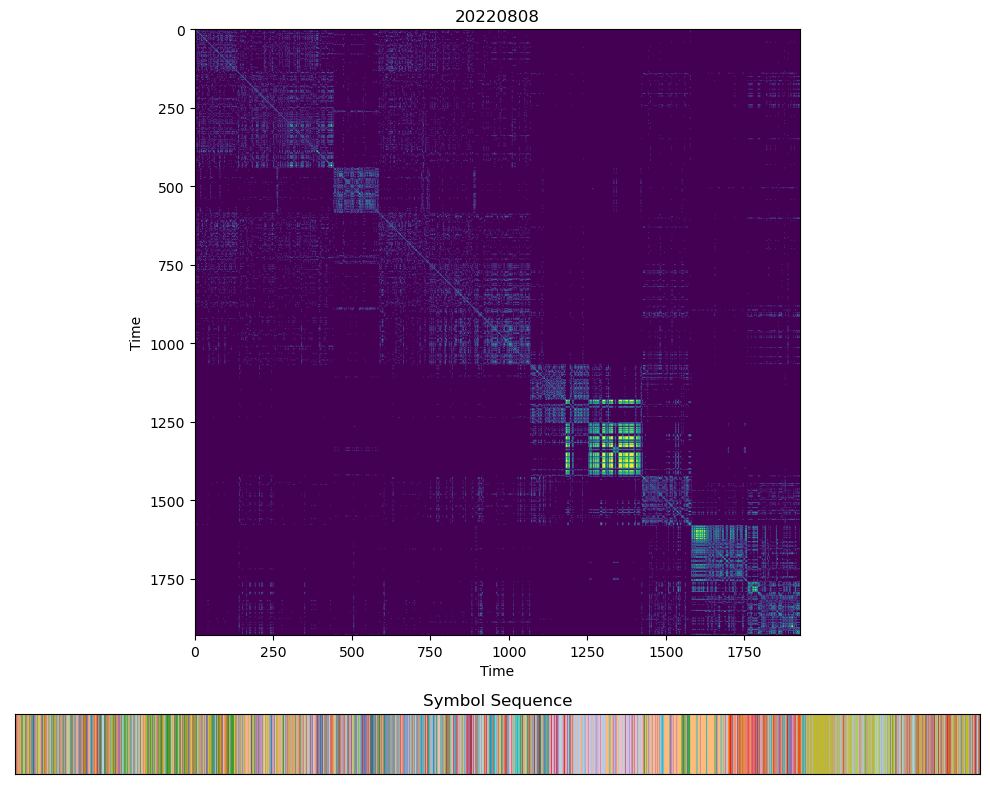

60


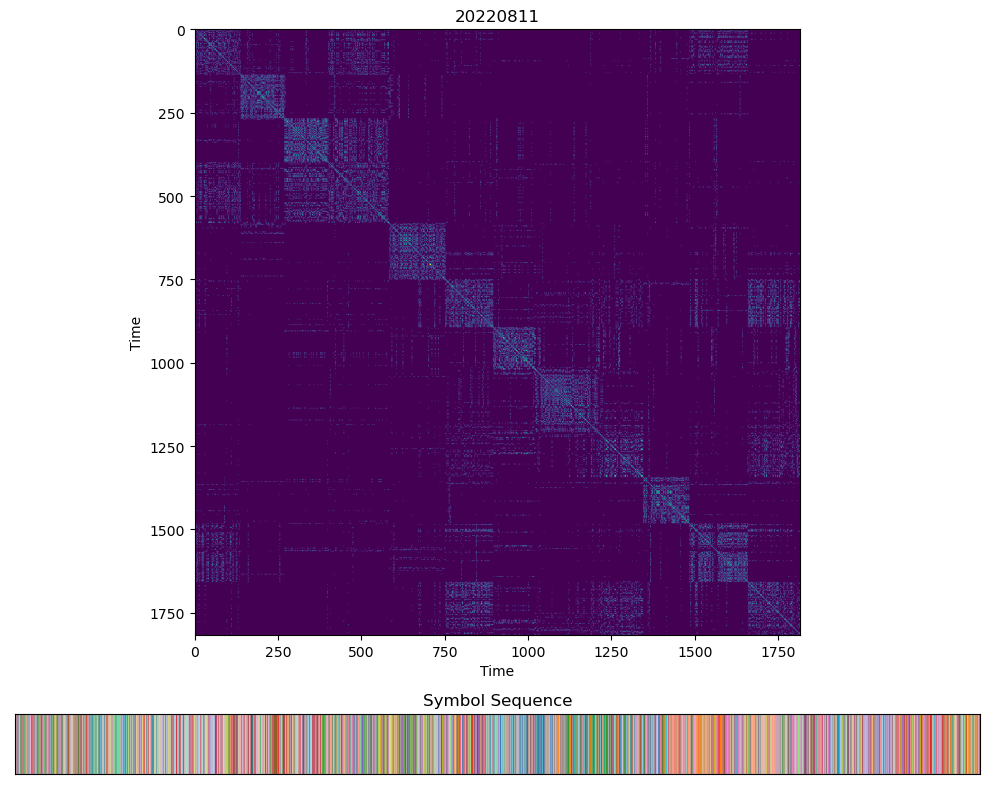

In [13]:
for session_code in recurrence_plots:
    recurrence_matrix = recurrence_plots[session_code]['rp']
    joint_seq = recurrence_plots[session_code]['symbol_sequence']

    # Step 1: Create a color map
    unique_symbols = np.unique(joint_seq)
    print(len(unique_symbols))
    # Create a colormap that maps each symbol to a color
    symbol_to_color = plt.cm.get_cmap('tab20', len(unique_symbols))
    symbol_colors = {symbol: symbol_to_color(i) for i, symbol in enumerate(unique_symbols)}

    # Initialize the figure with GridSpec
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1])

    # Step 2: Plot the Recurrence Matrix in a subplot
    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(recurrence_matrix)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Time')
    ax1.set_title(session_code)
    ax1.axis('on')

    # Step 3: Generate the Symbol Colorbar in another subplot
    # Create an array where each position corresponds to the color of the symbol at that position in the sequence
    symbol_sequence_colors = np.array([symbol_colors[symbol] for symbol in joint_seq]).reshape(1, len(joint_seq), 4)
    ax2 = fig.add_subplot(gs[1])
    ax2.imshow(symbol_sequence_colors, aspect='auto')
    ax2.set_title("Symbol Sequence")
    ax2.set_yticks([])
    ax2.set_xticks([])

    plt.tight_layout()
    plt.show()

    # 12 plots below
    # 5 s

In [52]:
columns_to_normalize = ['Average Dwell Time', 'Average Motif Length']

# Apply the custom transformation
for col in columns_to_normalize:
    data_df[col + ' Normalized'] = data_df.groupby(['Session'])[col].transform(lambda x: np.log2(x / x.mean()))

/tmp/ipykernel_1747739/2853581497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df['Session'] = aux_df['Session'].map(session_mapping)


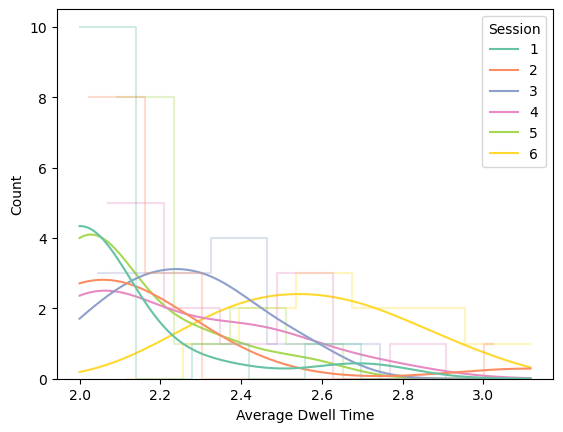

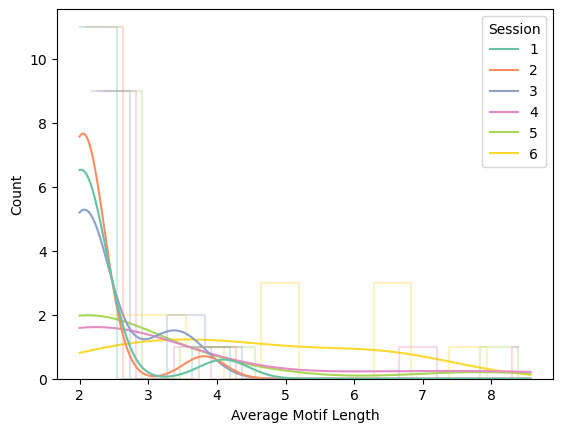

/tmp/ipykernel_1747739/2853581497.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df['Session'] = aux_df['Session'].map(session_mapping)


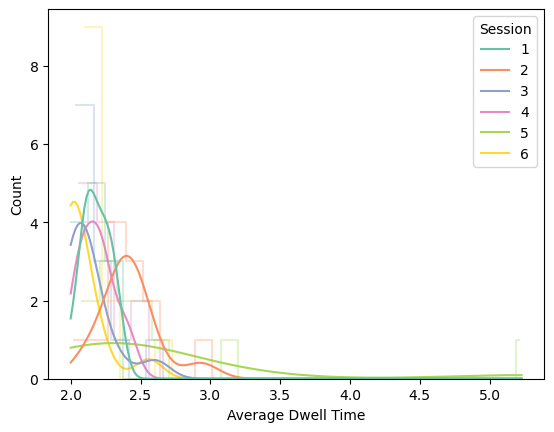

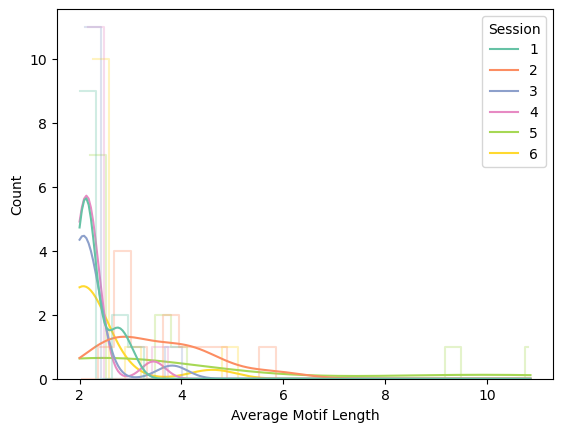

In [53]:
aux_df = data_df[data_df['Session Type'] == 'Synchronization']

session_list = list(set(aux_df['Session']))
session_mapping = {}
for i,session in enumerate(session_list):
    session_mapping[session] = i+1
session_mapping
aux_df['Session'] = aux_df['Session'].map(session_mapping)
metric_list = ['Average Dwell Time','Average Motif Length']

for metric in metric_list:
    sns.histplot(aux_df, x=metric,hue='Session',multiple='dodge',kde=True,palette='Set2', element='step', fill=False, alpha=0.3)

    legend = plt.gca().get_legend()
    for handle in legend.legendHandles:
        handle.set_alpha(1)  # Set the legend markers to fully opaque
        
    plt.show()

aux_df = data_df[data_df['Session Type'] == 'Syncopation']

session_list = list(set(aux_df['Session']))
session_mapping = {}
for i,session in enumerate(session_list):
    session_mapping[session] = i+1
session_mapping
aux_df['Session'] = aux_df['Session'].map(session_mapping)
metric_list = ['Average Dwell Time','Average Motif Length']

for metric in metric_list:
    sns.histplot(aux_df, x=metric,hue='Session',multiple='dodge',kde=True,palette='Set2', element='step', fill=False, alpha=0.3)

    legend = plt.gca().get_legend()
    for handle in legend.legendHandles:
        handle.set_alpha(1)  # Set the legend markers to fully opaque
        
    plt.show()

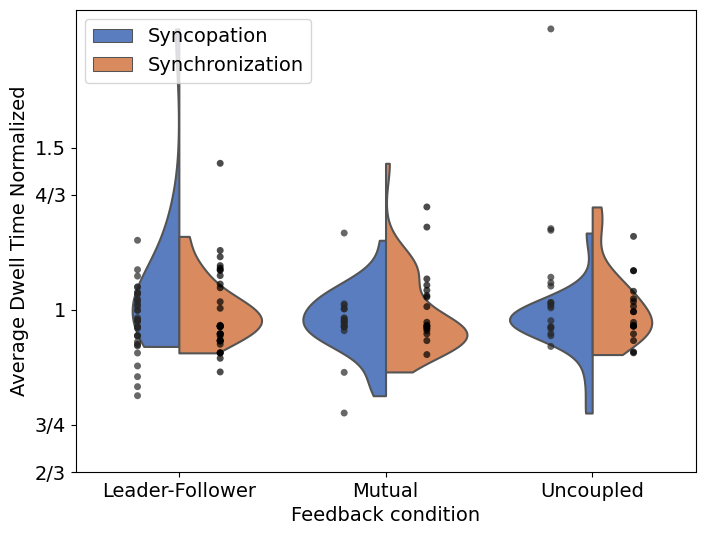

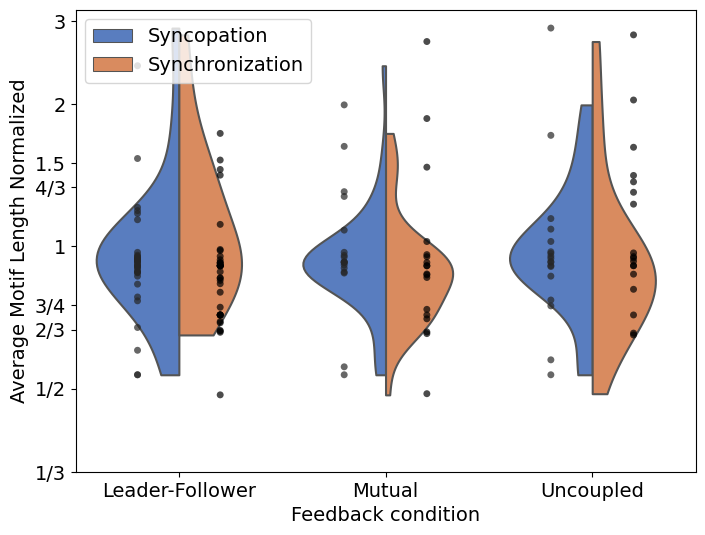

In [54]:
# Set global font size for all elements
plt.rcParams.update({'font.size': 14})

metric_list = ['Average Dwell Time Normalized','Average Motif Length Normalized']

# Define the tick values and labels
log2_tick_values = np.log2([3, 2, 1.5, 4/3, 1, 3/4, 2/3, 1/2, 1/3])
tick_labels = ['3', '2', '1.5', '4/3', '1', '3/4', '2/3', '1/2', '1/3']

log2_tick_values2 = np.log2([1.5, 4/3, 1, 3/4, 2/3])
tick_labels2 = ['1.5', '4/3', '1', '3/4', '2/3']

for metric in metric_list:
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    condition_order = ['Uncoupled', 'Leader-Follower', 'Mutual']

    # Create the violin plot
    sns.violinplot(x='Condition', y=metric, hue='Session Type', data=data_df, split=True, inner=None, order=condition_order, palette='muted', cut=0, ax=ax)
    sns.stripplot(x='Condition', y=metric, hue='Session Type', data=data_df, dodge=True, color='black', edgecolor='black', size=5, alpha=0.7, jitter=False, ax=ax)

    # Add titles and labels as needed
    ax.set_xlabel('Feedback condition')
    ax.set_ylabel(metric)

    # Set y-axis tick locations and labels
    if metric == 'Average Dwell Time Normalized':
        ax.set_yticks(log2_tick_values2)
        ax.set_yticklabels(tick_labels2)
    else:
        ax.set_yticks(log2_tick_values)
        ax.set_yticklabels(tick_labels)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:2], labels[0:2], loc='upper left')

    # Display the plot
    plt.show()
